In [39]:
import pandas as pd
import seaborn as sns
import re
import os

# standard count of files in the folder. 
def count_files_in_directory(directory_path):
    try:
        # List all the files and directories in the given directory
        items = os.listdir(directory_path)
        
        # Filter out directories, keeping only files
        files = [item for item in items if os.path.isfile(os.path.join(directory_path, item))]
        
        # Return the number of files
        return len(files)
    
    except FileNotFoundError:
        return "Directory not found"
    except Exception as e:
        return f"An error occurred: {e}"

# using the function
directory_path = 'C:/stats_research/data_llm-for-cpu/stats'
file_count = count_files_in_directory(directory_path)

#-----------------------------------------------------------

# Dictionary to hold the data
data = {}


for i in range(1, file_count + 1):
    file_path = f'C:/stats_research/data_llm-for-cpu/stats/stats_00{i}.txt'
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # Grabbing keys to use in the dictionary
        for line in lines:
            parts = line.split()
            
            if len(parts) < 2:
                continue
            
            key = parts[0]
            
            # This giant if statment checks if there is an instruction or some other specific 
            # columns for the new variables that'll be calculated later on. 
            # This variable list may change depending on what we're looking at (including if we just want to focus on DRAM for instance)
            # "data" in key) or ("Data" in key)

            if ("inst" in key) or ("Inst" in key) or ('system.cpu.mmu.dtb.rdMisses' in key) or ('system.cpu.mmu.dtb.wrMisses' in key) or ('system.cpu.mmu.itb.rdMisses' in key) or ('system.cpu.mmu.itb.wrMisses' in key) or ('system.cpu.numCycles' in key):
                if not("system.mem_ctrl.dram" in key):
                    value = float(parts[1])

                    if key in data:
                        data[key].append(value)
                    else:
                        data[key] = [value]

    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred while reading {file_path}: {e}")

df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

print(df.head())


    simInsts  hostInstRate  system.cpu.numCycles  \
0  2081696.0     1316213.0             4218006.0   
1  2081647.0     1352445.0             4217922.0   
2  2081571.0     1254327.0             4217754.0   

   system.cpu.exec_context.thread_0.numInsts  \
0                                  2081696.0   
1                                  2081647.0   
2                                  2081571.0   

   system.cpu.exec_context.thread_0.numCondCtrlInsts  \
0                                           347568.0   
1                                           347559.0   
2                                           347550.0   

   system.cpu.exec_context.thread_0.numIntInsts  \
0                                     3548176.0   
1                                     3548092.0   
2                                     3547946.0   

   system.cpu.exec_context.thread_0.numFpInsts  \
0                                       9003.0   
1                                       9003.0   
2                 

In [40]:
# just checking if the head actually works 
df.head(100000)

,simInsts,hostInstRate,system.cpu.numCycles,system.cpu.exec_context.thread_0.numInsts,system.cpu.exec_context.thread_0.numCondCtrlInsts,system.cpu.exec_context.thread_0.numIntInsts,system.cpu.exec_context.thread_0.numFpInsts,system.cpu.exec_context.thread_0.numVecInsts,system.cpu.exec_context.thread_0.numLoadInsts,system.cpu.exec_context.thread_0.numStoreInsts,...,system.cpu.exec_context.thread_0.statExecutedInstType::IprAccess,system.cpu.exec_context.thread_0.statExecutedInstType::InstPrefetch,system.cpu.exec_context.thread_0.statExecutedInstType::total,system.cpu.mmu.dtb.rdMisses,system.cpu.mmu.dtb.wrMisses,system.cpu.mmu.itb.rdMisses,system.cpu.mmu.itb.wrMisses,system.cpu.thread_0.numInsts,system.workload.inst.arm,system.workload.inst.quiesce
0,2081696.0,1316213.0,4218006.0,2081696.0,347568.0,3548176.0,9003.0,0.0,513645.0,188361.0,...,0.0,0.0,3577737.0,1513.0,100.0,0.0,396.0,0.0,0.0,0.0
1,2081647.0,1352445.0,4217922.0,2081647.0,347559.0,3548092.0,9003.0,0.0,513637.0,188357.0,...,0.0,0.0,3577656.0,1513.0,100.0,0.0,396.0,0.0,0.0,0.0
2,2081571.0,1254327.0,4217754.0,2081571.0,347550.0,3547946.0,9015.0,0.0,513618.0,188351.0,...,0.0,0.0,3577516.0,1513.0,100.0,0.0,396.0,0.0,0.0,0.0


In [41]:
# # because there is no need for more padding (seems like every value is covered), check for missing values and remove/fill them?
# df.fillna(0, inplace=True)
# # df = df.drop(df.columns[0], axis=1)
missing_values = df.isnull().sum()
print(missing_values)

simInsts                                             0
hostInstRate                                         0
system.cpu.numCycles                                 0
system.cpu.exec_context.thread_0.numInsts            0
system.cpu.exec_context.thread_0.numCondCtrlInsts    0
                                                    ..
system.cpu.mmu.itb.rdMisses                          0
system.cpu.mmu.itb.wrMisses                          0
system.cpu.thread_0.numInsts                         0
system.workload.inst.arm                             0
system.workload.inst.quiesce                         0
Length: 71, dtype: int64


In [42]:
# make new columns here. 
# - data mpki cache misses per 1000 instructions (data table)
#     - 1000 * (system.cpu0.mmu.dtb.rdMisses +system.cpu0.mmu.dtb.wrMisses) / simInsts
# - instruction mpki (instruction table)
#     - 1000 * (system.cpu0.mmu.itb.rdMisses +system.cpu0.mmu.itb.wrMisses) / simInsts

df['data_mpki'] = 1000 * (df['system.cpu.mmu.dtb.rdMisses'] + df['system.cpu.mmu.dtb.wrMisses'] / df['simInsts'])
df['inst_mpki'] = 1000 * (df['system.cpu.mmu.itb.rdMisses'] + df['system.cpu.mmu.itb.wrMisses'] / df['simInsts'])
df['IPC'] = df['simInsts'] / df['system.cpu.numCycles']

In [43]:
df.to_csv("review.csv", sep=',', index=False)
df.head()


,simInsts,hostInstRate,system.cpu.numCycles,system.cpu.exec_context.thread_0.numInsts,system.cpu.exec_context.thread_0.numCondCtrlInsts,system.cpu.exec_context.thread_0.numIntInsts,system.cpu.exec_context.thread_0.numFpInsts,system.cpu.exec_context.thread_0.numVecInsts,system.cpu.exec_context.thread_0.numLoadInsts,system.cpu.exec_context.thread_0.numStoreInsts,...,system.cpu.mmu.dtb.rdMisses,system.cpu.mmu.dtb.wrMisses,system.cpu.mmu.itb.rdMisses,system.cpu.mmu.itb.wrMisses,system.cpu.thread_0.numInsts,system.workload.inst.arm,system.workload.inst.quiesce,data_mpki,inst_mpki,IPC
0,2081696.0,1316213.0,4218006.0,2081696.0,347568.0,3548176.0,9003.0,0.0,513645.0,188361.0,...,1513.0,100.0,0.0,396.0,0.0,0.0,0.0,1.513000e+06,0.190230,0.493526
1,2081647.0,1352445.0,4217922.0,2081647.0,347559.0,3548092.0,9003.0,0.0,513637.0,188357.0,...,1513.0,100.0,0.0,396.0,0.0,0.0,0.0,1.513000e+06,0.190234,0.493524
2,2081571.0,1254327.0,4217754.0,2081571.0,347550.0,3547946.0,9015.0,0.0,513618.0,188351.0,...,1513.0,100.0,0.0,396.0,0.0,0.0,0.0,1.513000e+06,0.190241,0.493526


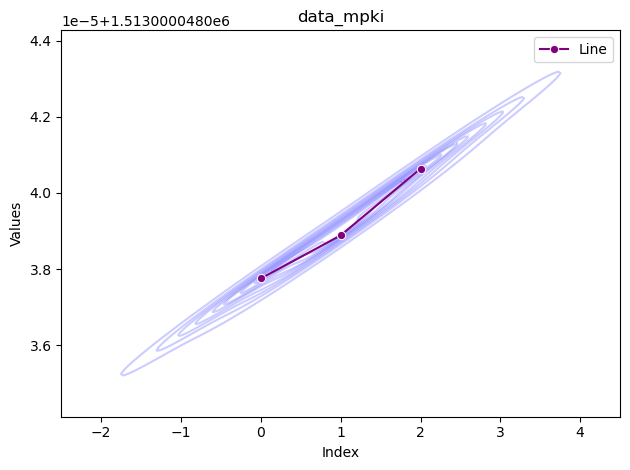

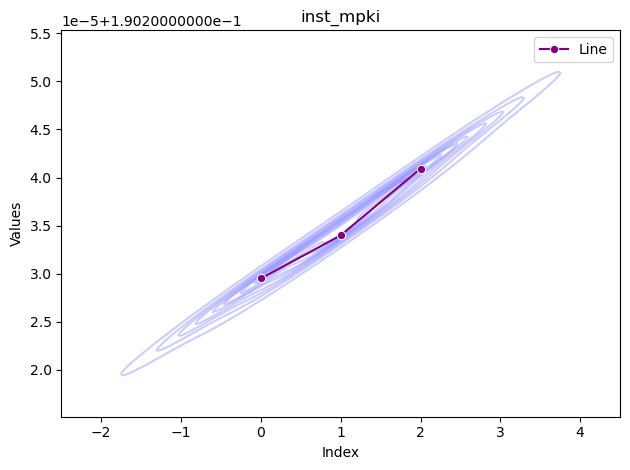

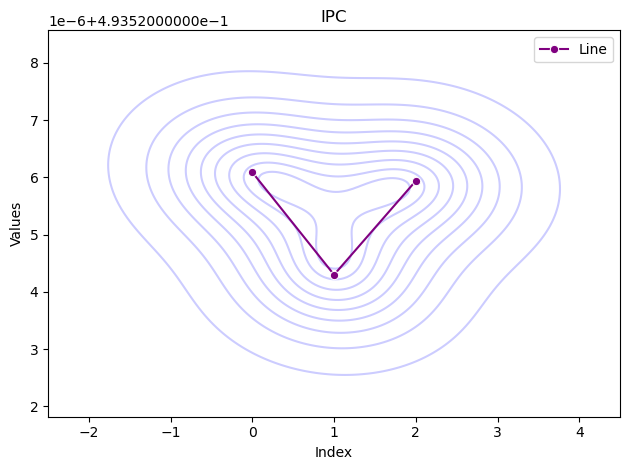

In [44]:
# most important graphs are here regarding those new variables. 

import matplotlib.pyplot as plt
import seaborn as sns


# I think kde plots are cool for showing concentrations but idk how they'll be at the moment. 

columns = ['data_mpki', 'inst_mpki', 'IPC']
for column in columns:
    plt.figure()  
    sns.kdeplot(x=df.index, y=df[column], color='blue', label = 'Barplot', alpha=0.2)
    sns.lineplot(x=df.index, y=df[column], marker='o', color = 'purple', label = 'Line')
    plt.title(column)  
    plt.xlabel('Index')  
    plt.ylabel('Values')  
    plt.tight_layout()
    plt.show()  


0.0
4217894.0
310347.8522315227


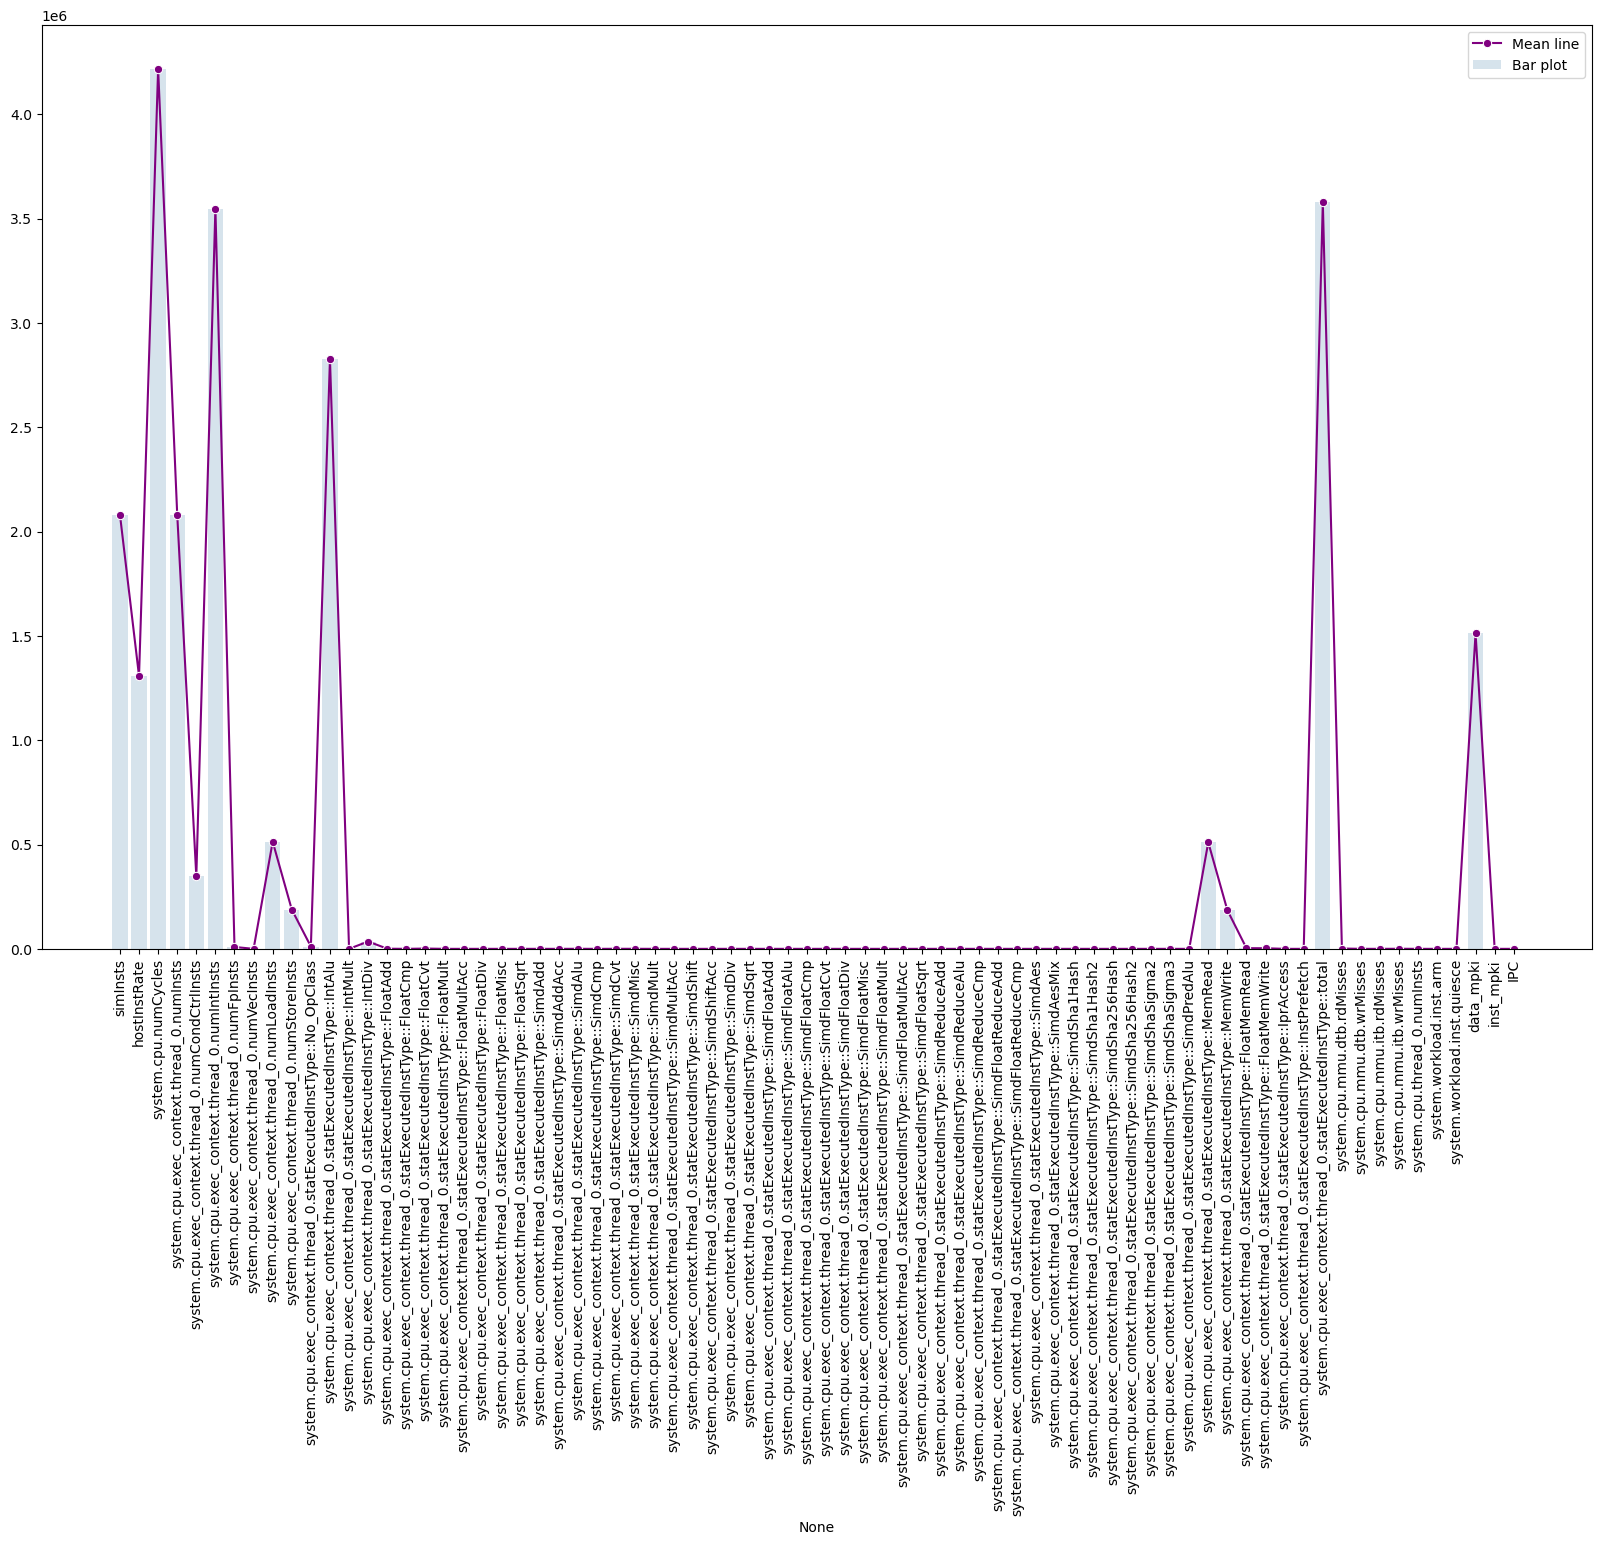

In [48]:
# before looking at the graph for each simulation, average each of the instructions 

# once again bar plots are not the way considering just how big the data is 

# This graph does NOT use log scaling

import numpy as np 

mean_values = df.mean()
print(mean_values.min())
print(mean_values.max())
print(mean_values.mean())

# mean_values_filtered = [value for value in mean_values.values if value != 0]
plt.figure(figsize=(20,12))
sns.barplot(x=mean_values.index, y=mean_values.values, alpha=0.2, label='Bar plot')
sns.lineplot(x=mean_values.index, y=mean_values.values, marker='o', color='purple', label='Mean line')
# plt.ylim(0,0.1e5)
# plt.ylim(0,1e2)
# plt.ylim(ylim)
_ = plt.xticks(rotation=90)

0.0
4217894.0
310347.8522315227


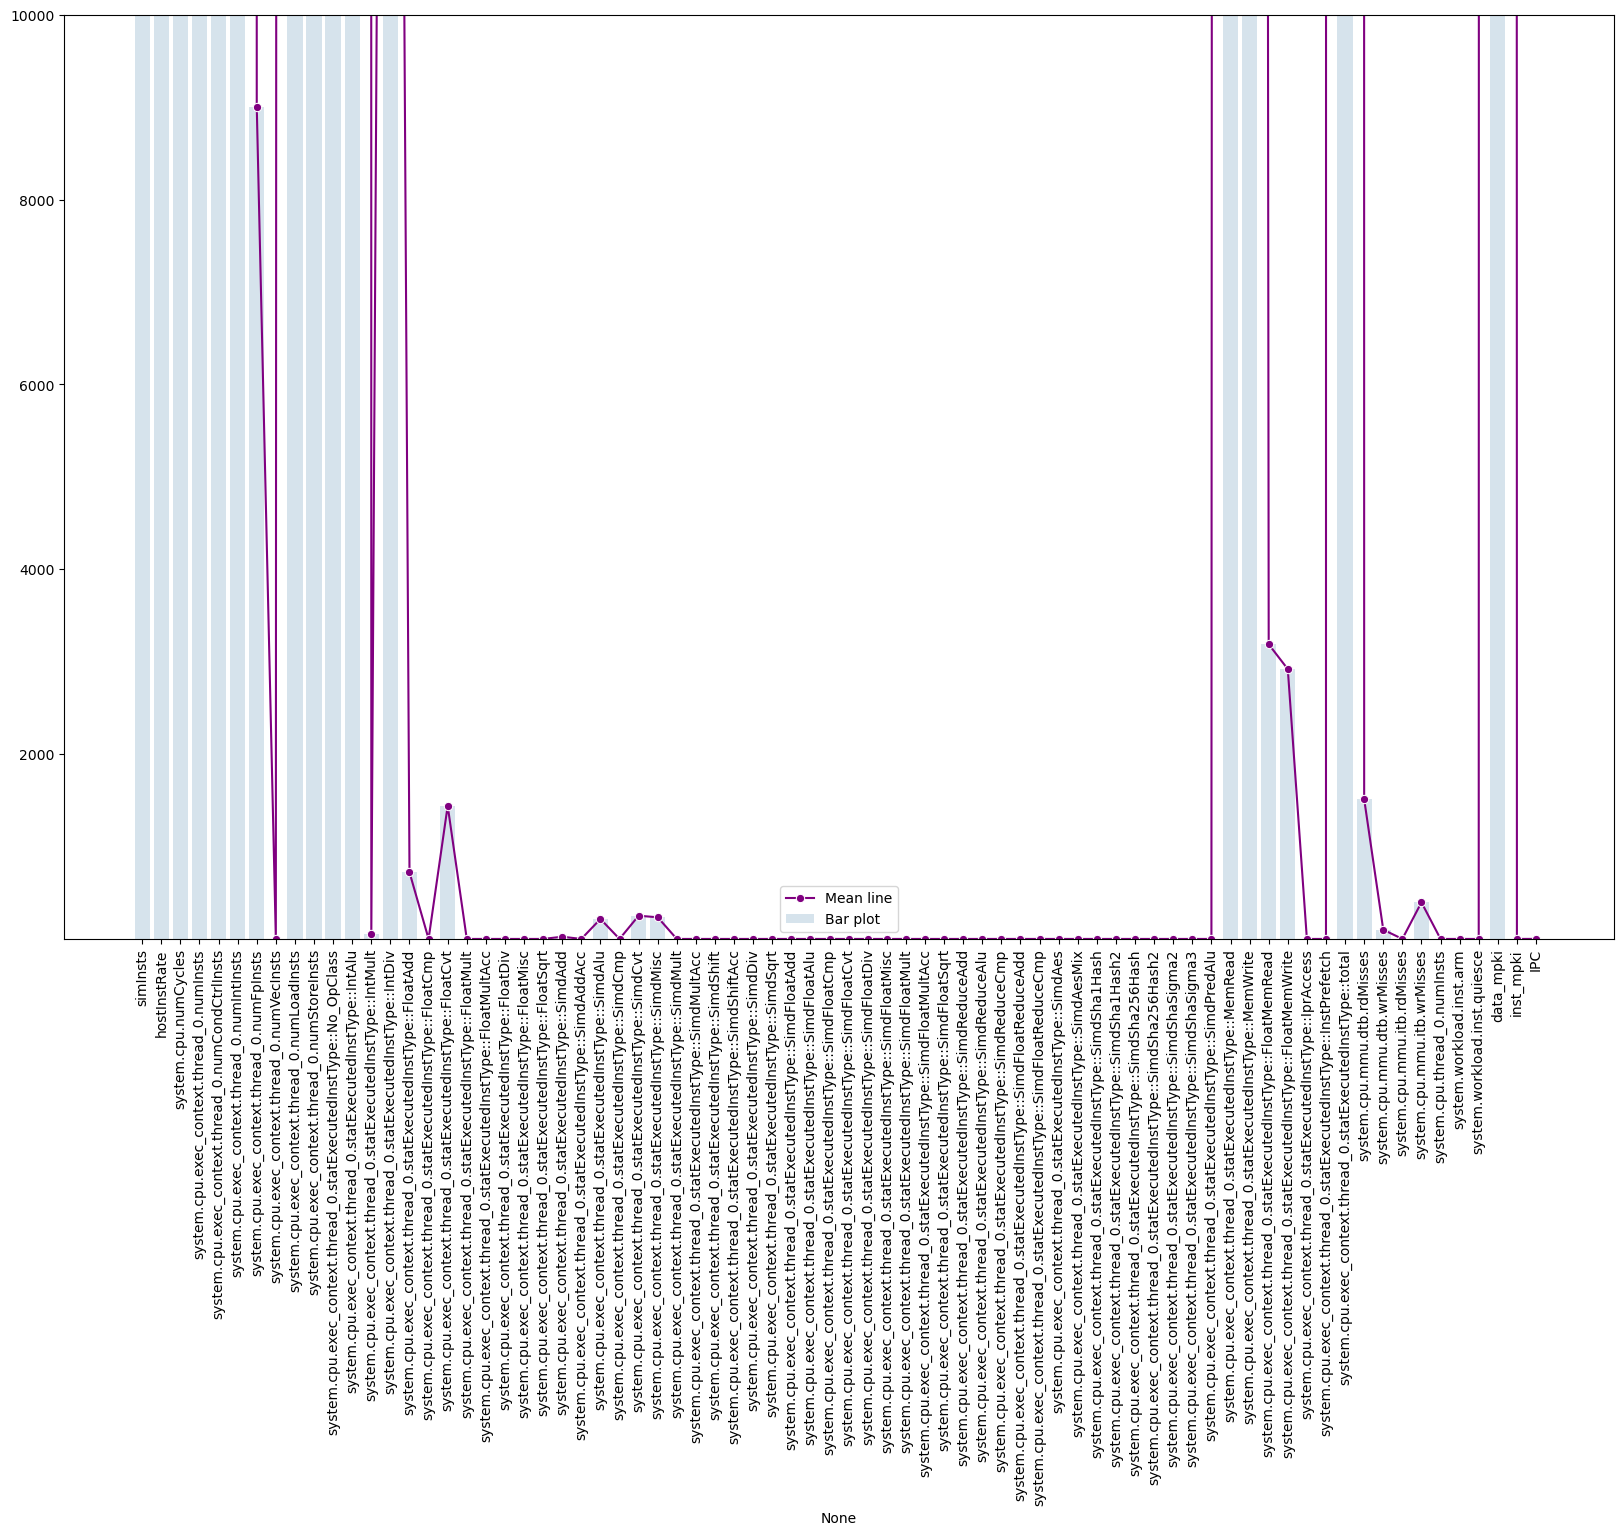

In [49]:
# This graph actually uses the scaling

#logarithmic scale -> upper lower boundaries 
p75 = mean_values.quantile(0.75) * 2.5
ylim = (1, 10**np.ceil(np.log10(p75)))


# mean_values_filtered = [value for value in mean_values.values if value != 0]
plt.figure(figsize=(20,12))
sns.barplot(x=mean_values.index, y=mean_values.values, alpha=0.2, label='Bar plot')
sns.lineplot(x=mean_values.index, y=mean_values.values, marker='o', color='purple', label='Mean line')
plt.ylim(ylim)
_ = plt.xticks(rotation=90)

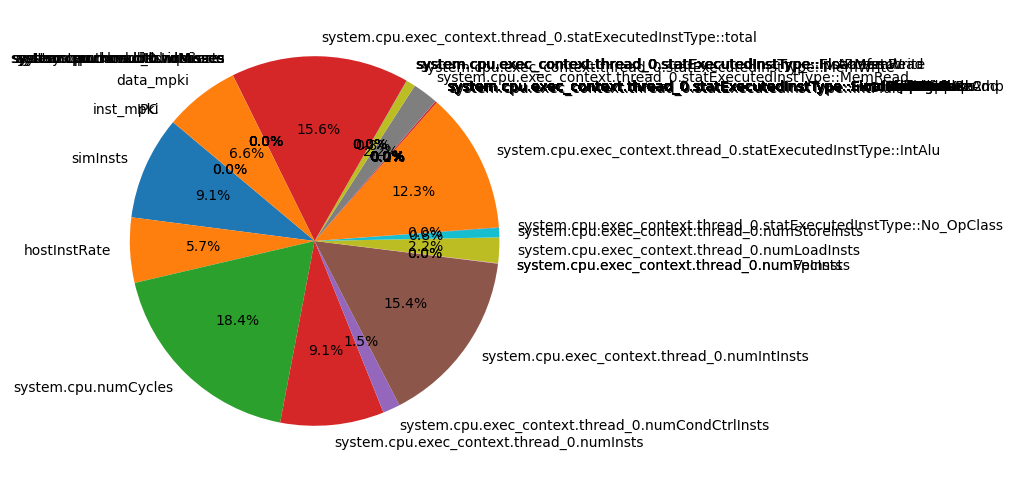

In [46]:
# just a quick and dirty pie chart to get an idea of the highest values right now 

mean_values = df.mean()

plt.figure(figsize=(10,6))

plt.pie(mean_values, labels=mean_values.index, autopct='%1.1f%%', startangle=140);

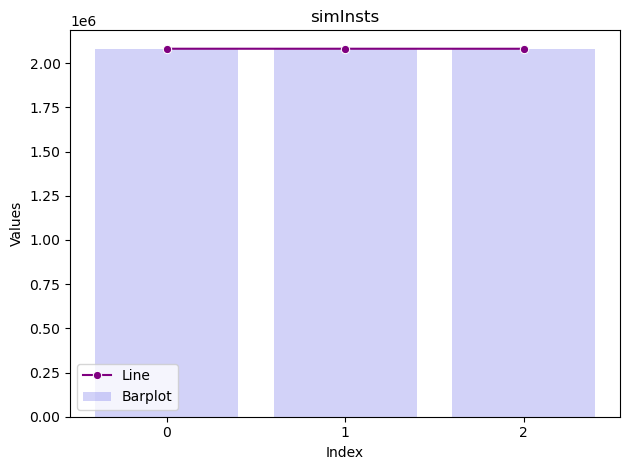

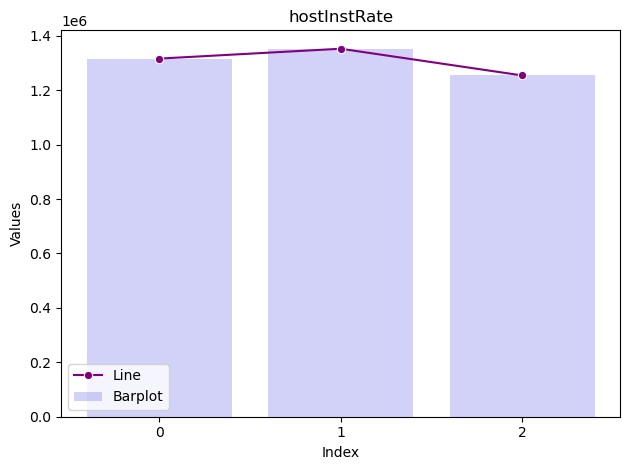

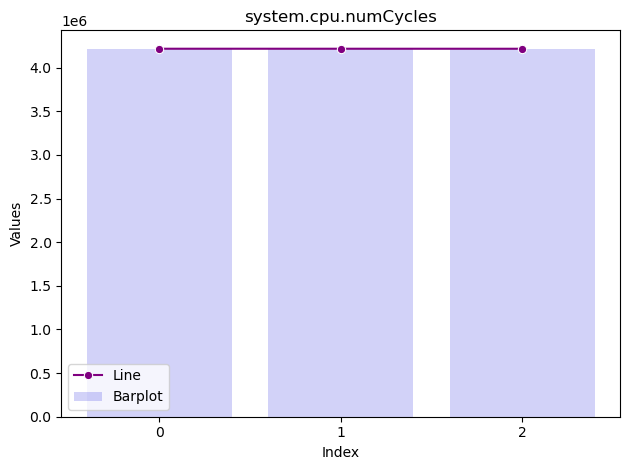

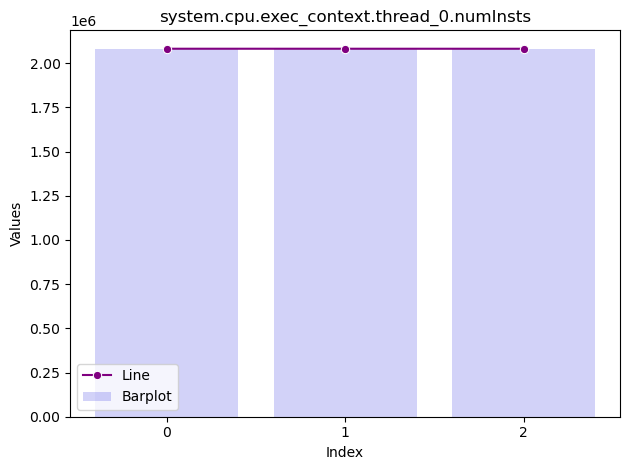

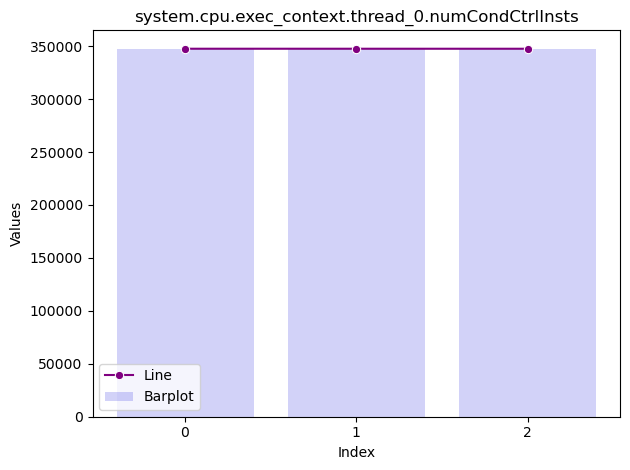

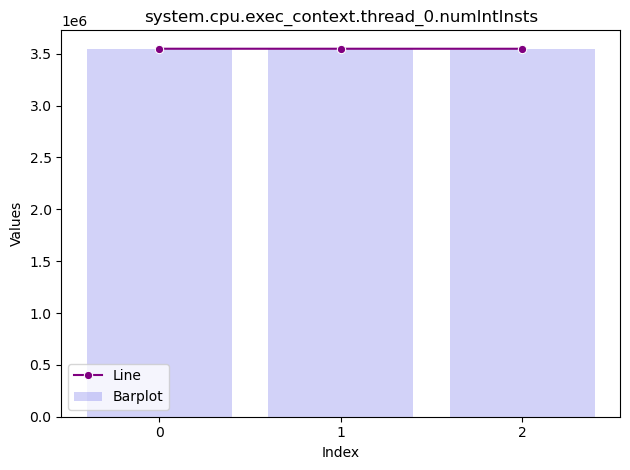

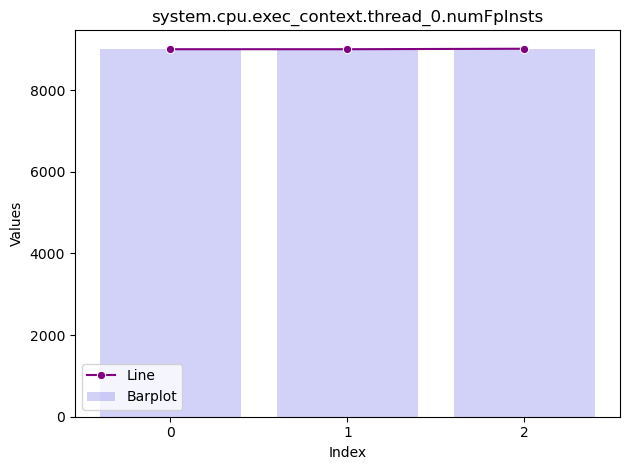

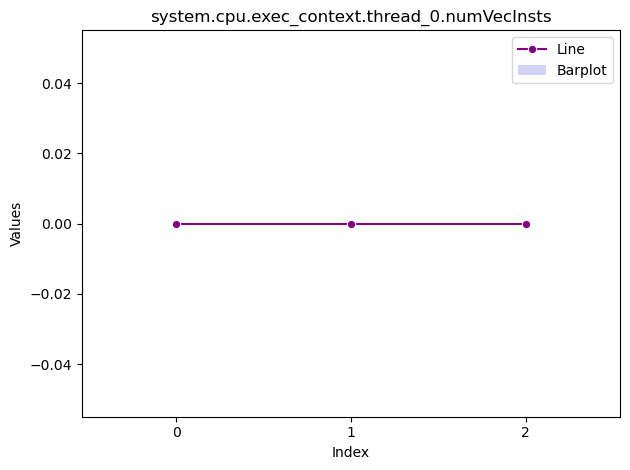

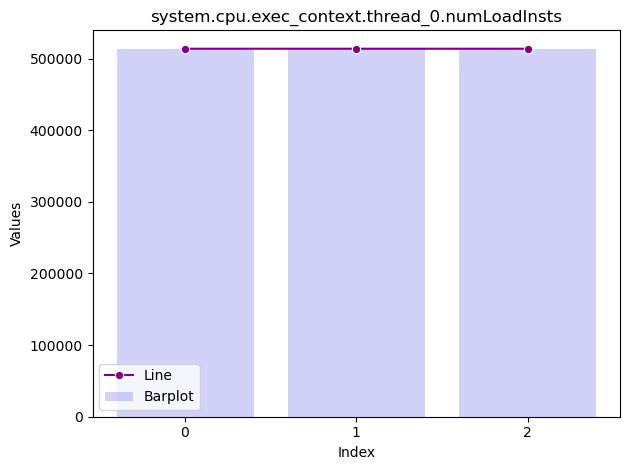

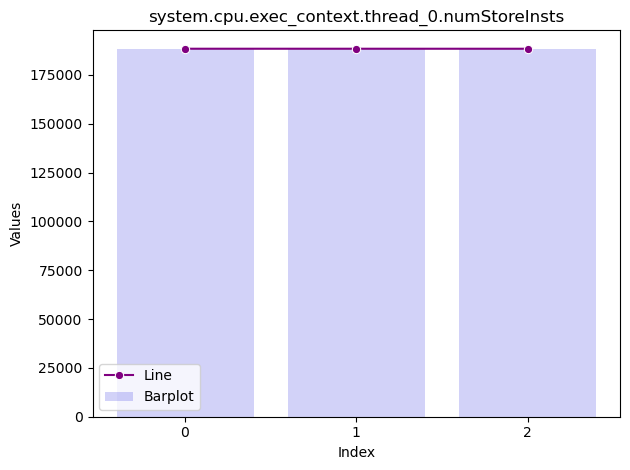

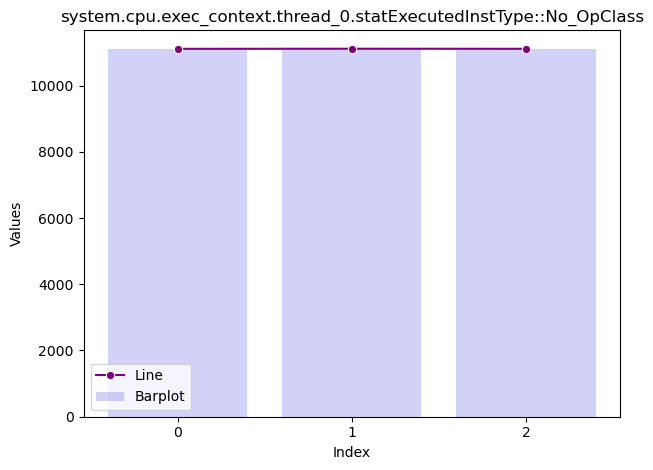

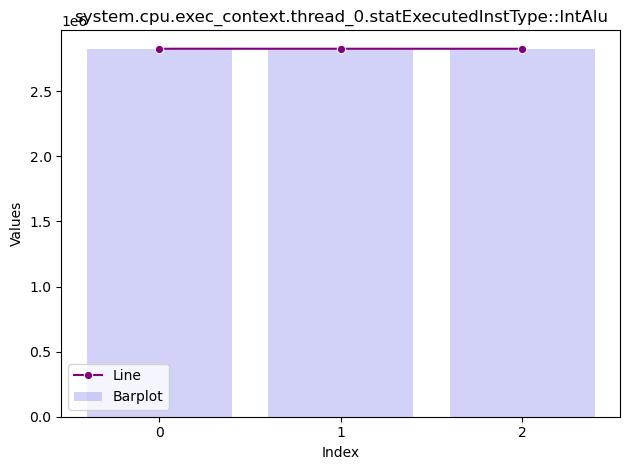

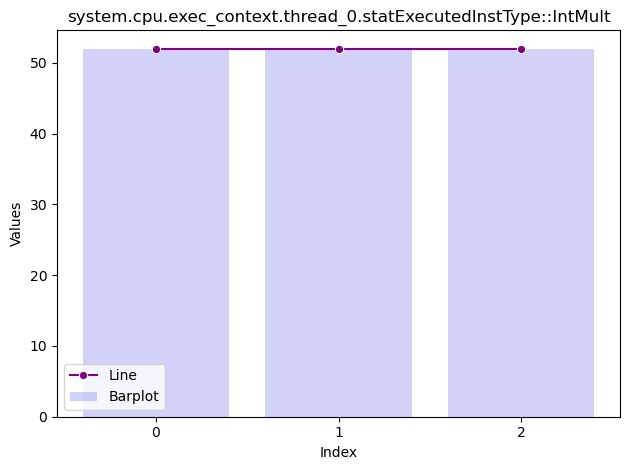

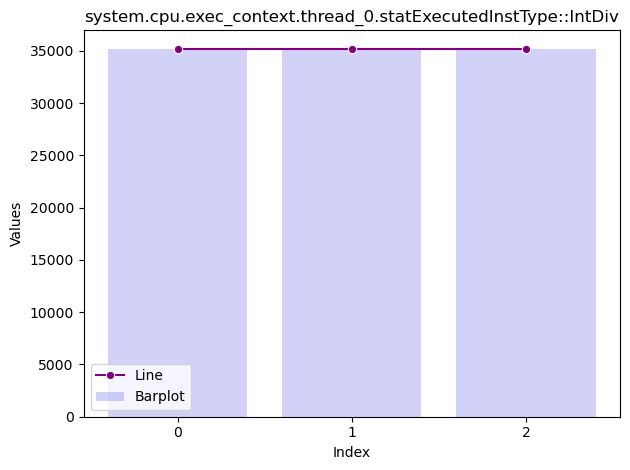

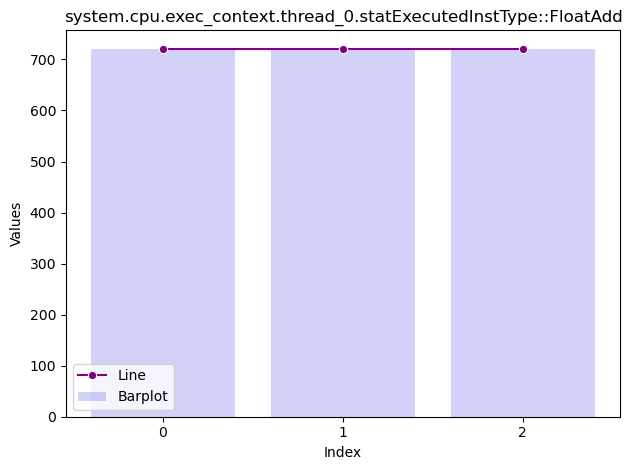

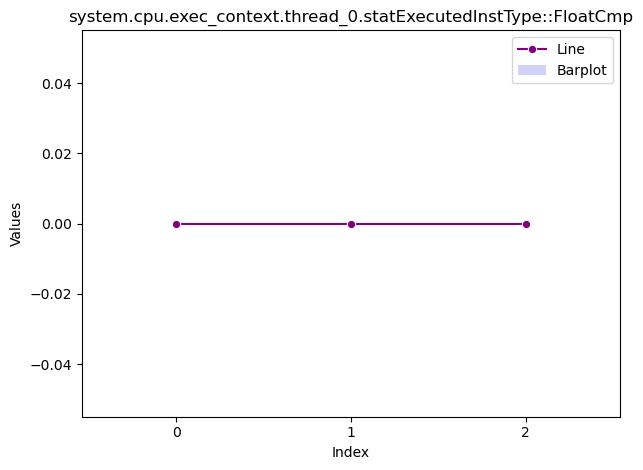

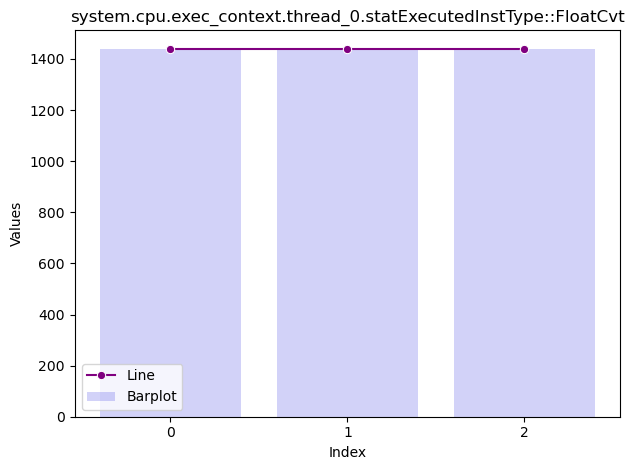

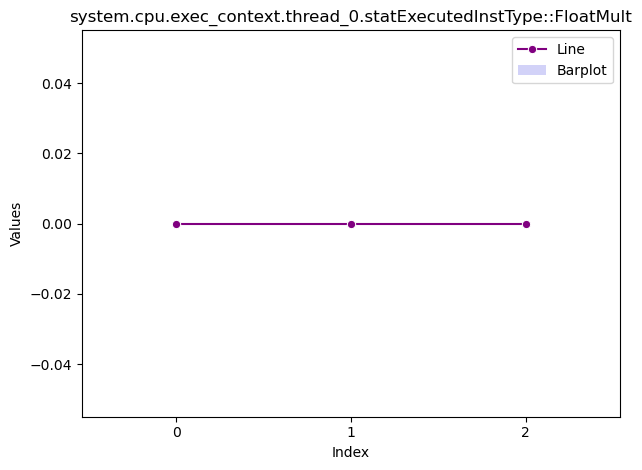

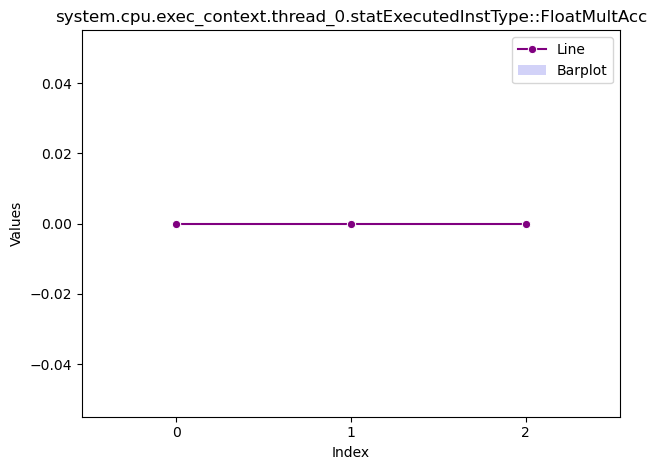

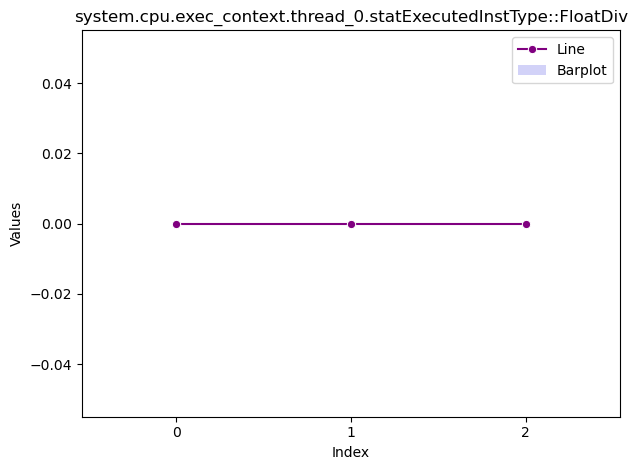

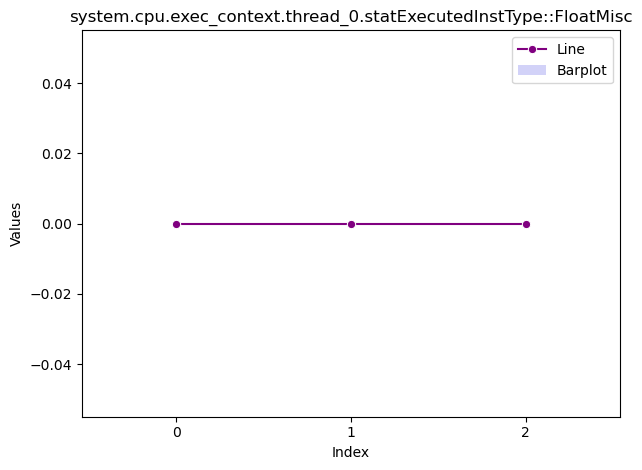

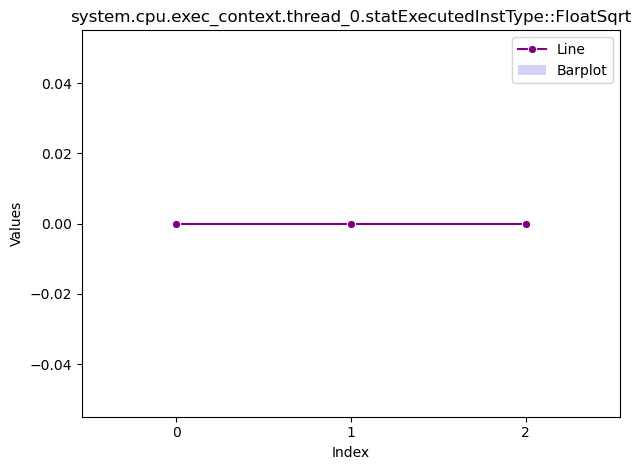

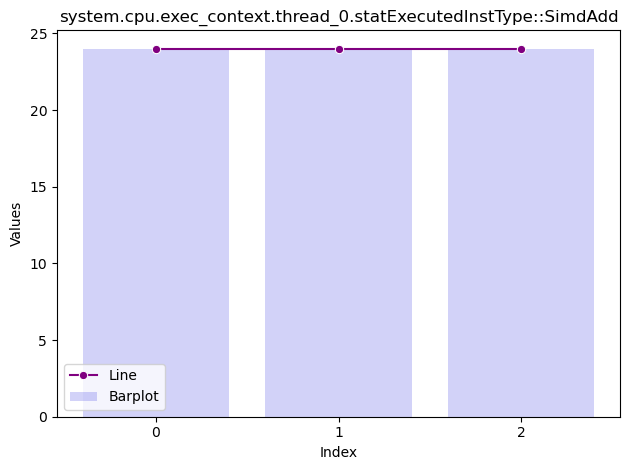

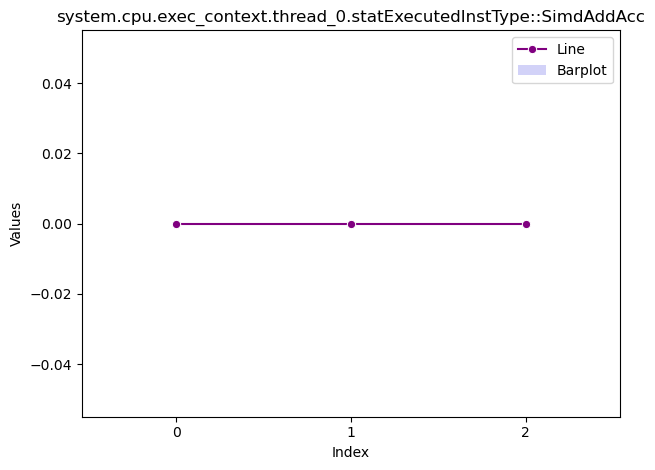

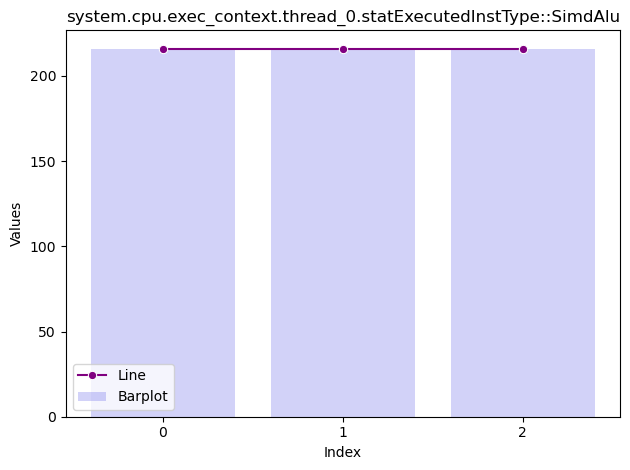

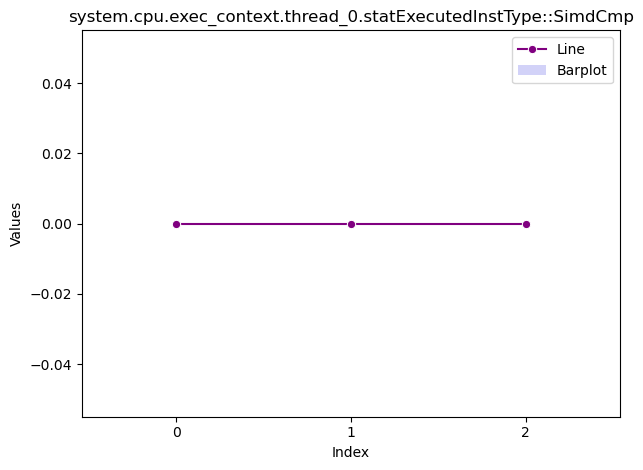

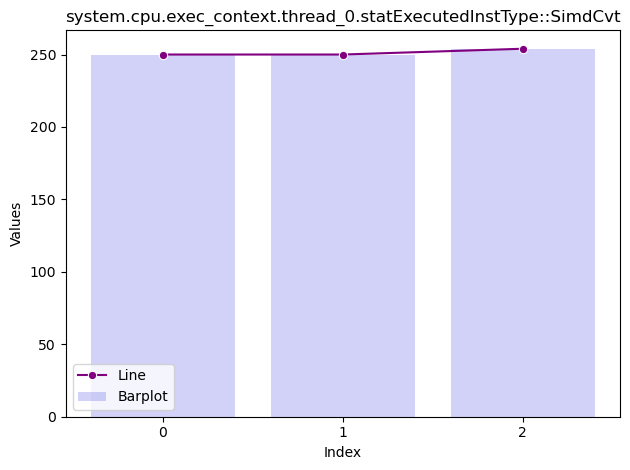

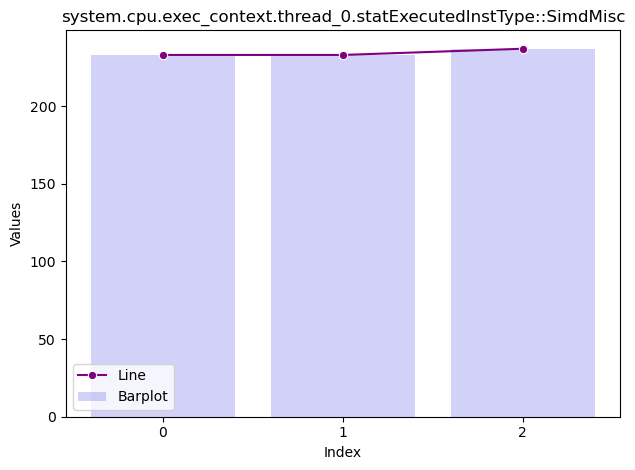

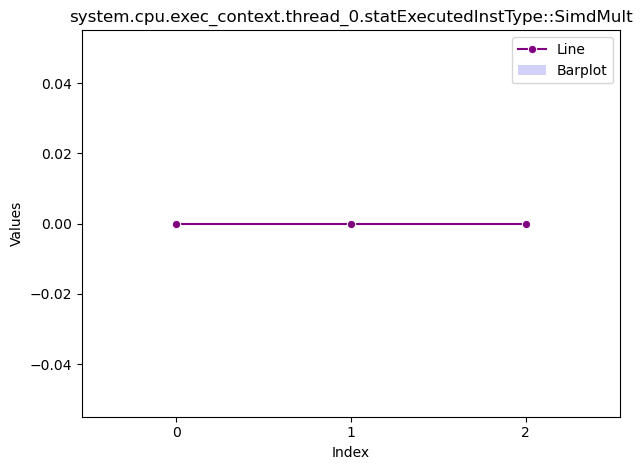

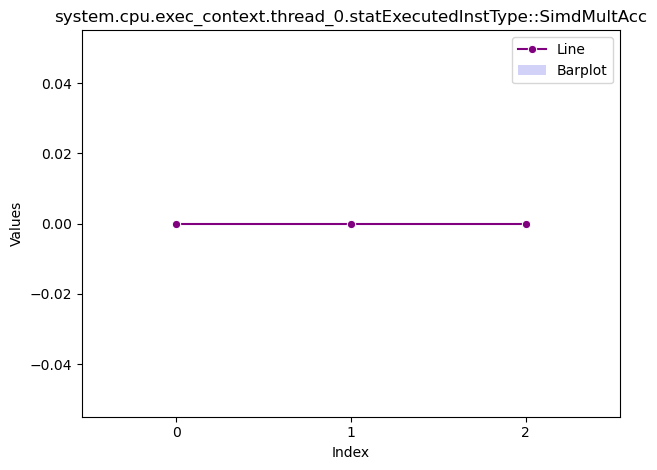

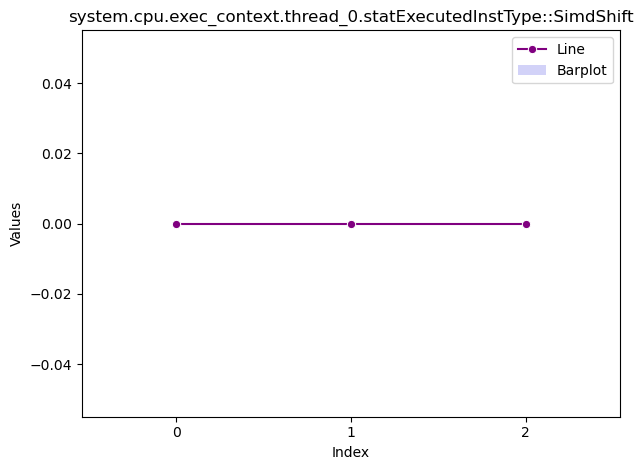

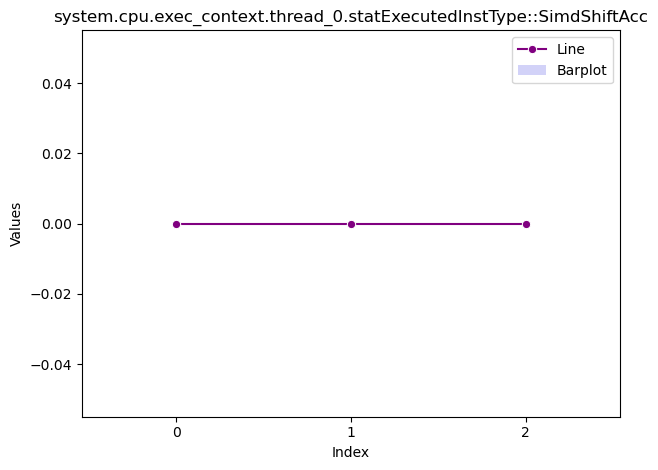

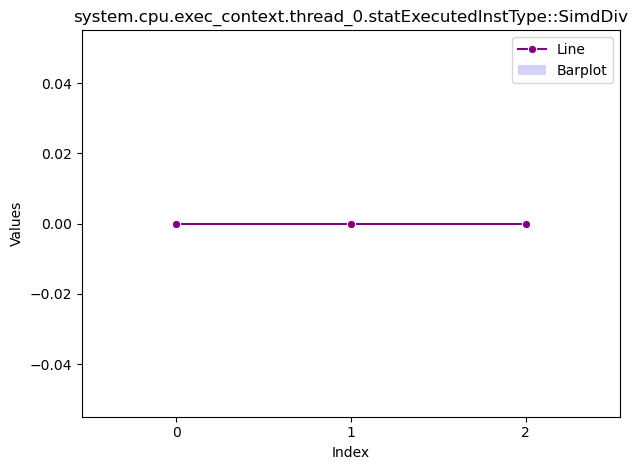

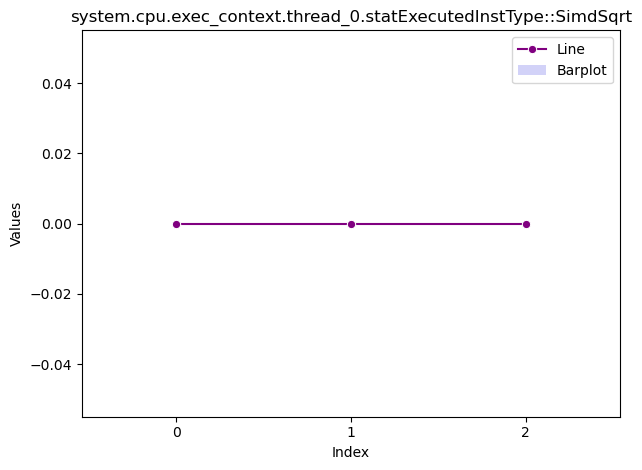

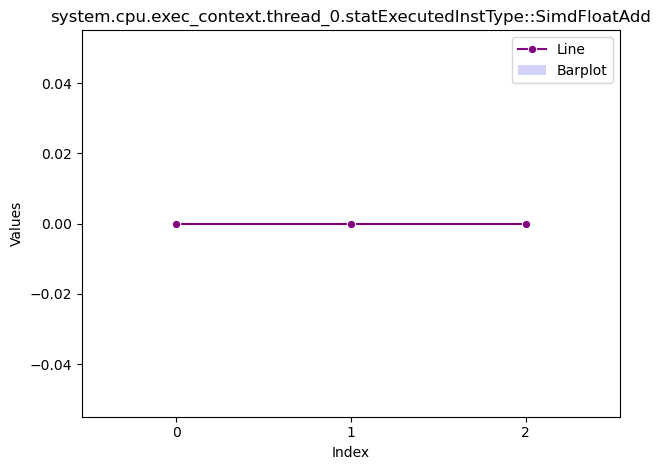

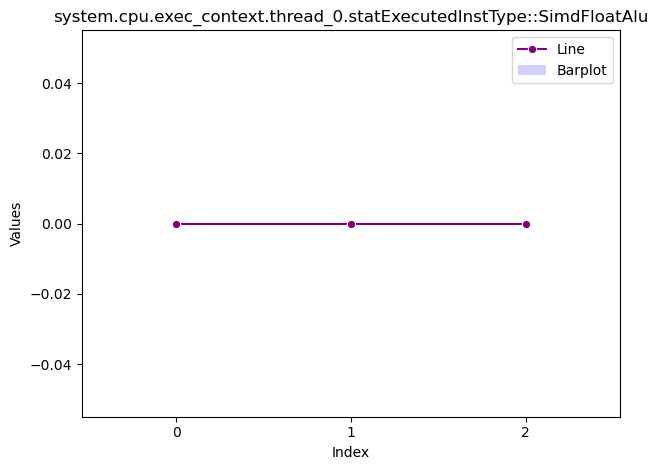

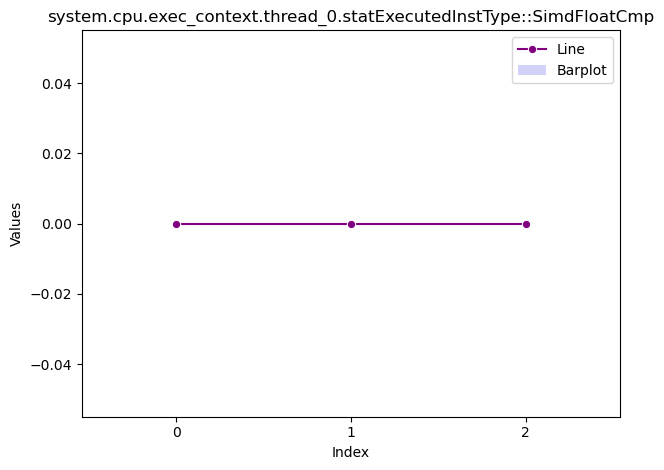

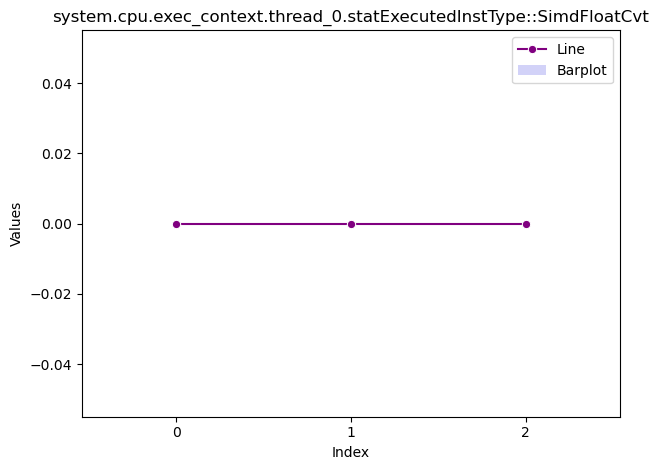

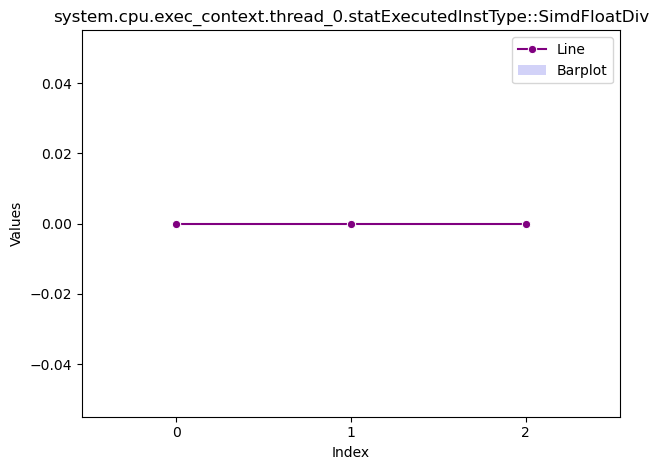

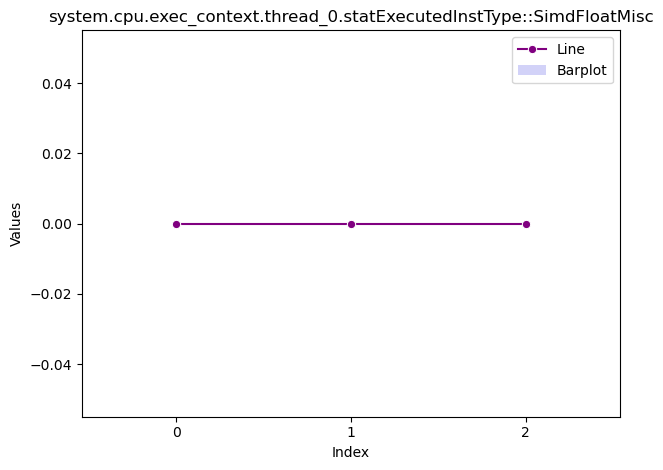

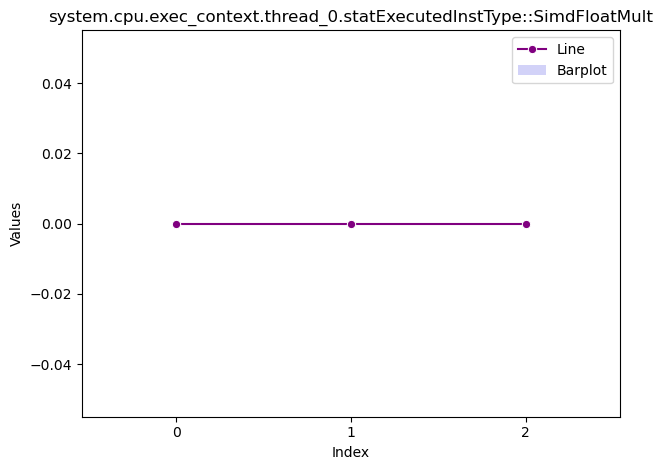

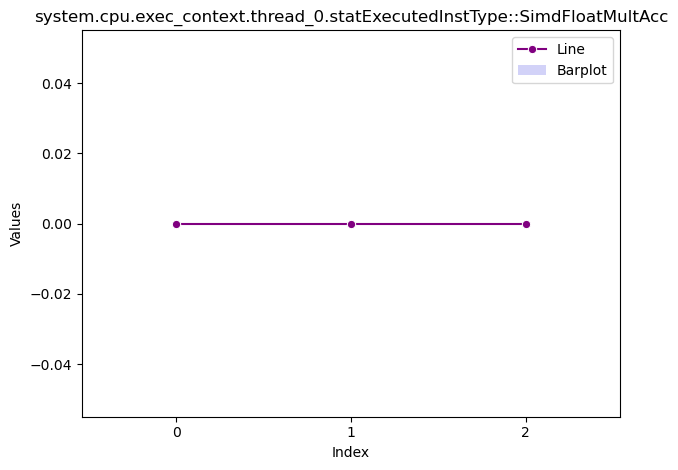

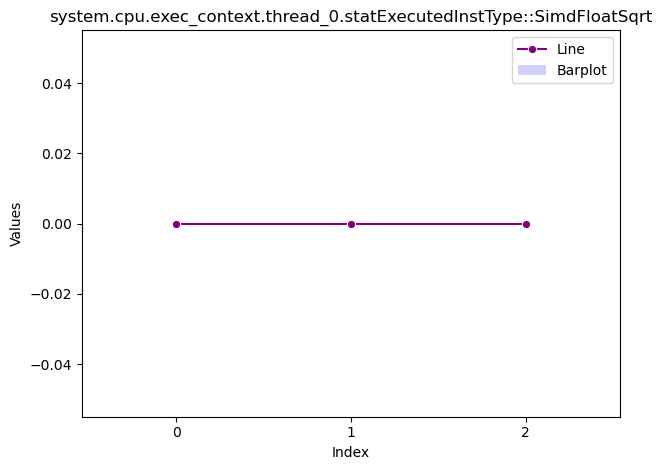

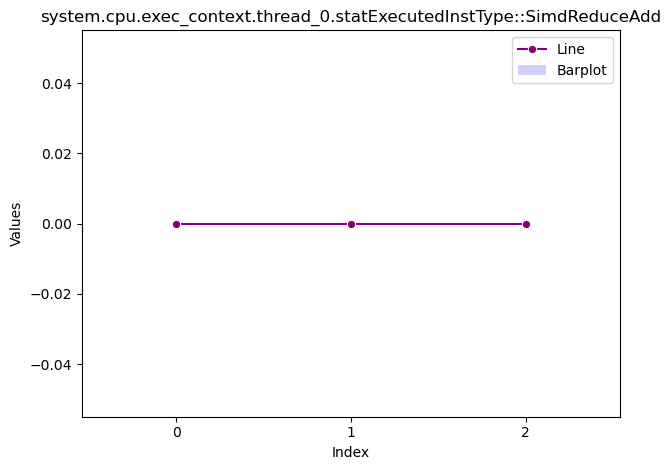

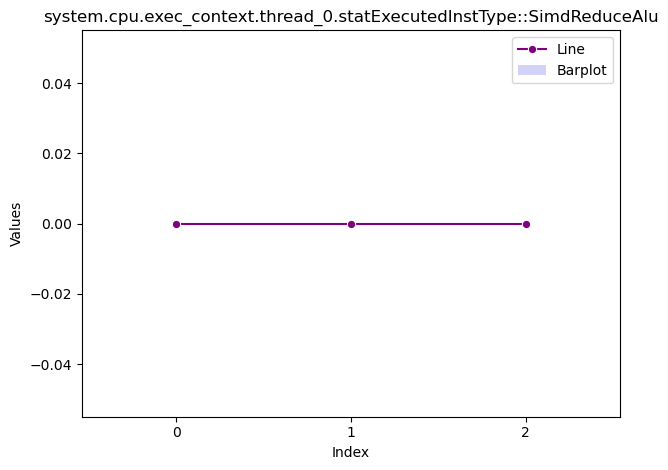

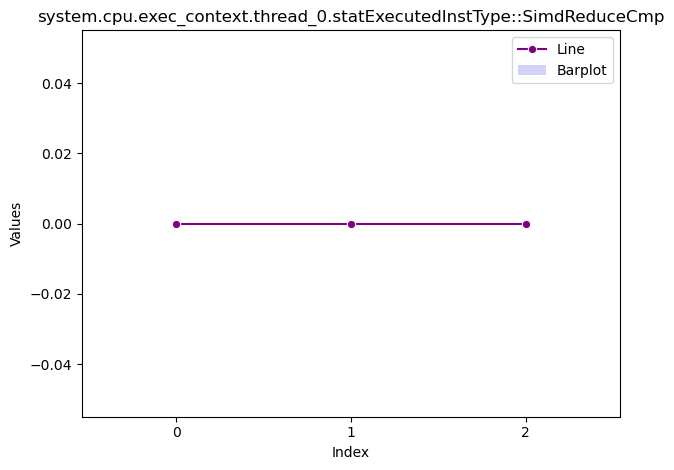

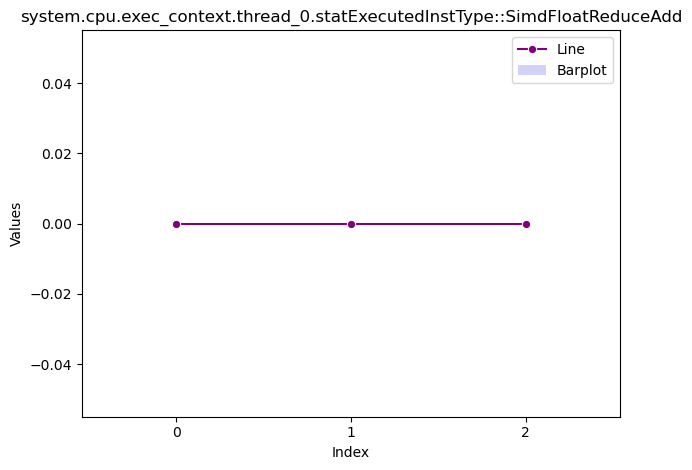

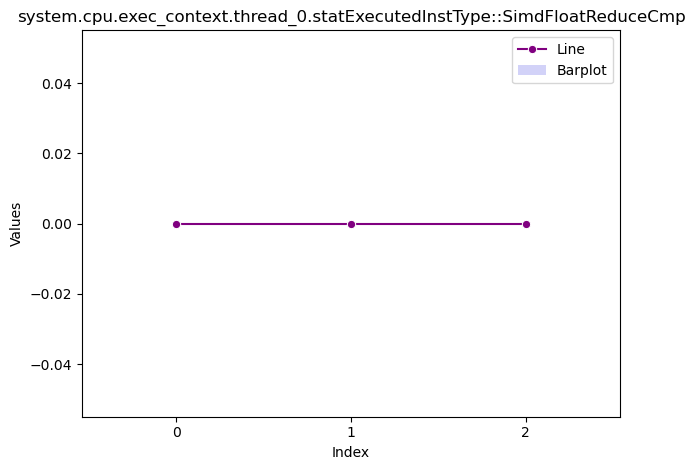

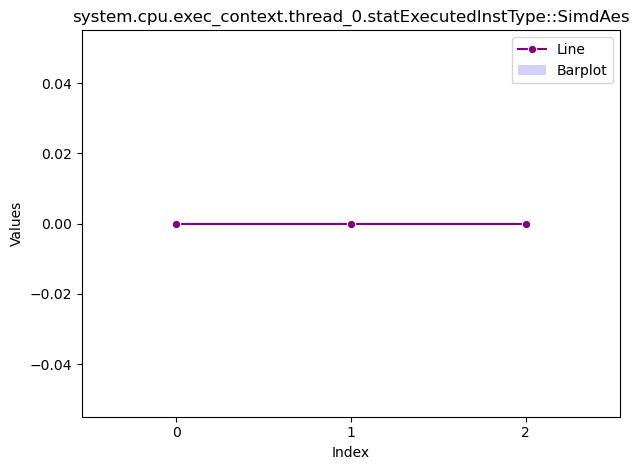

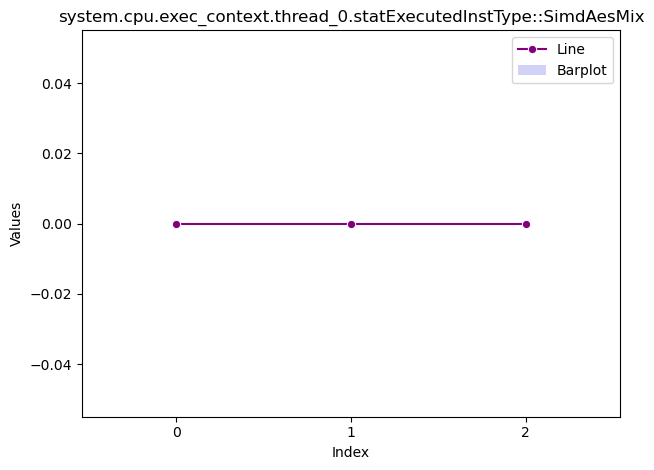

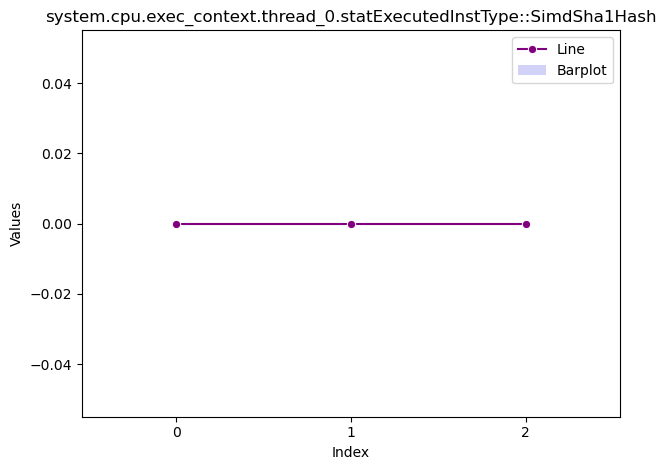

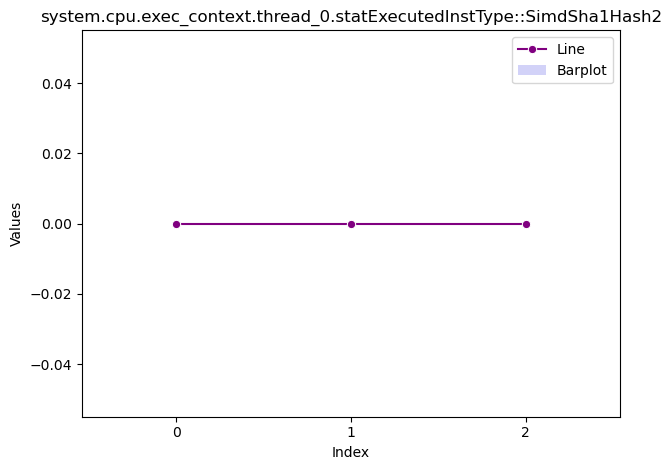

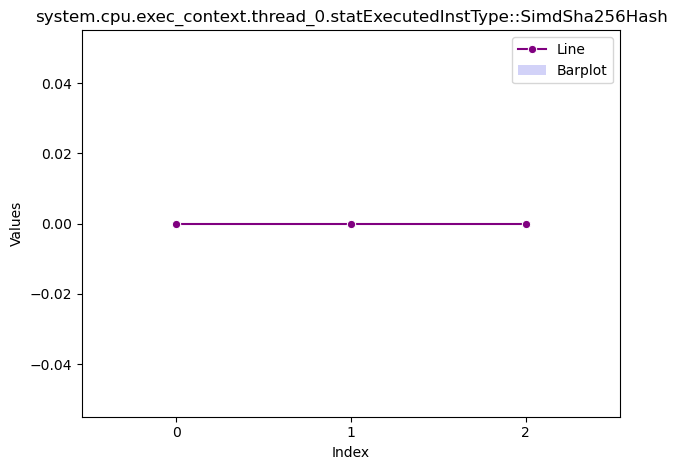

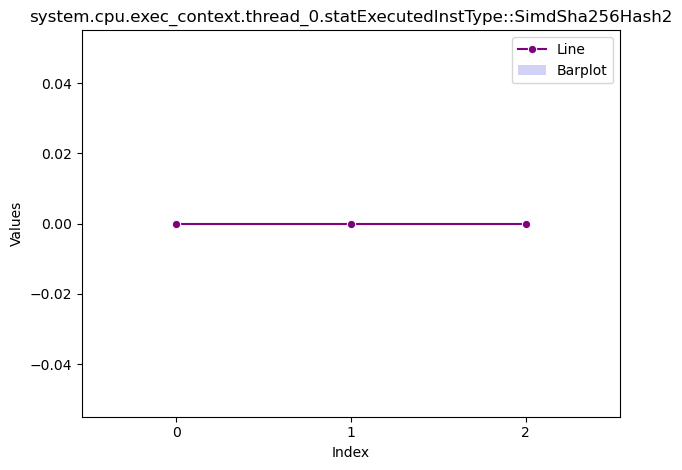

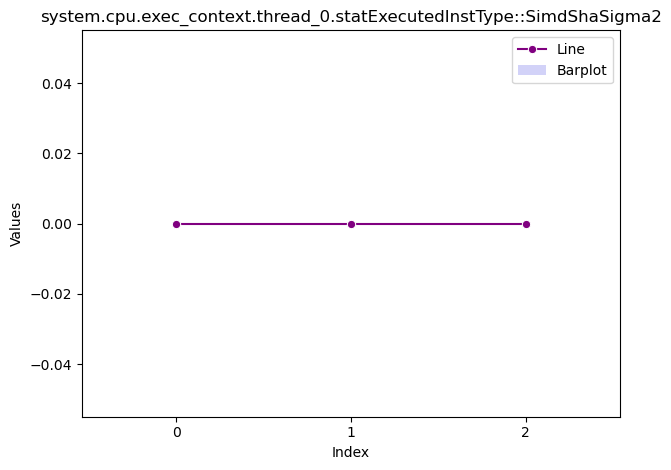

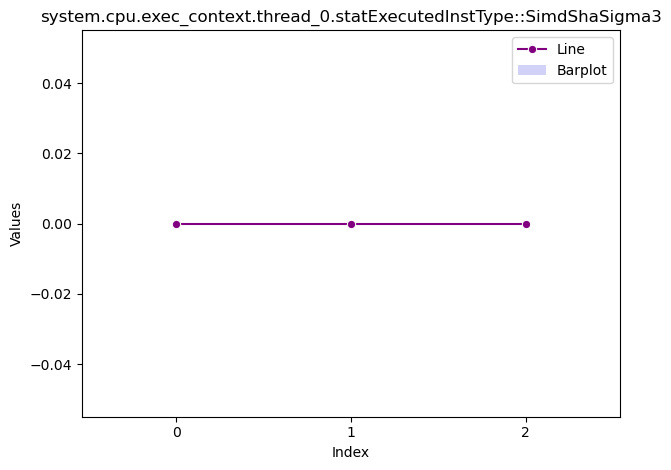

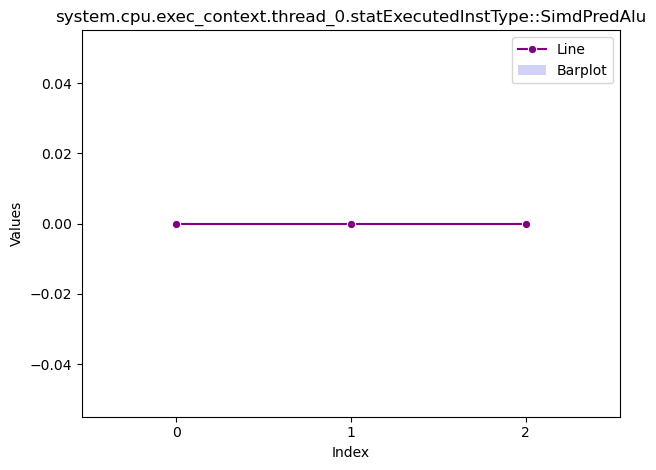

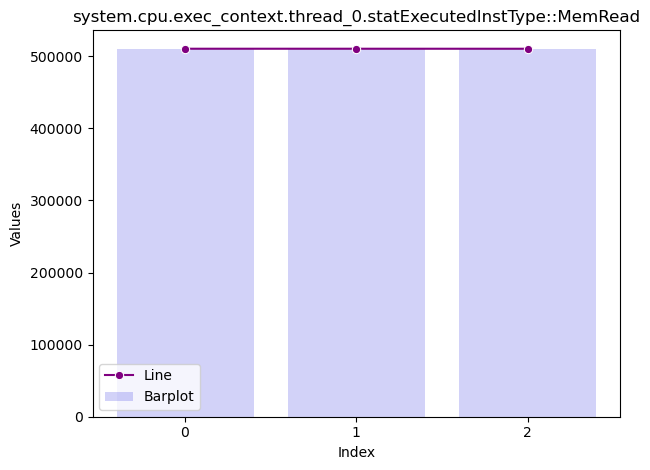

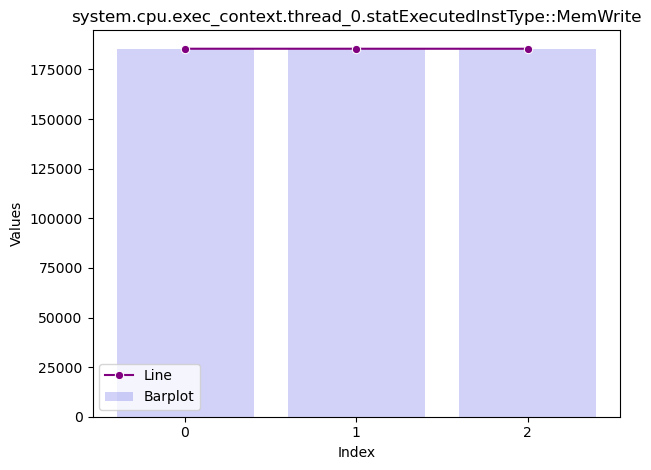

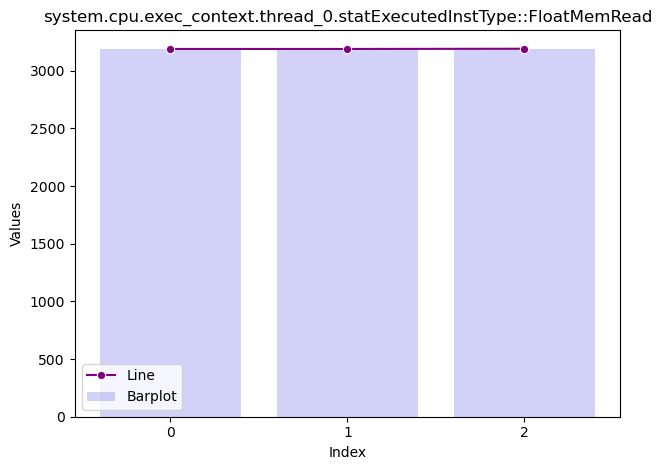

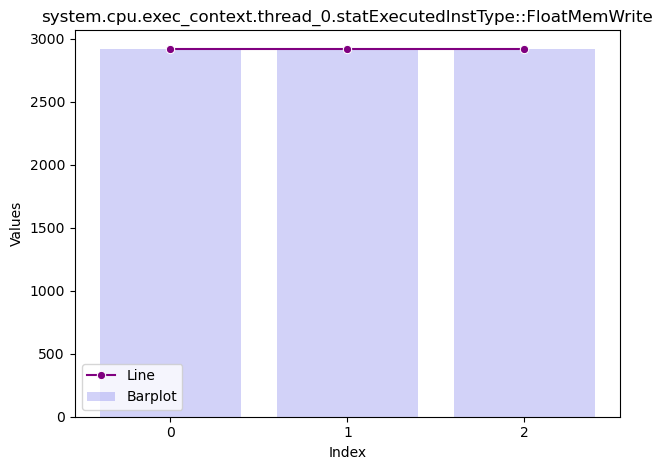

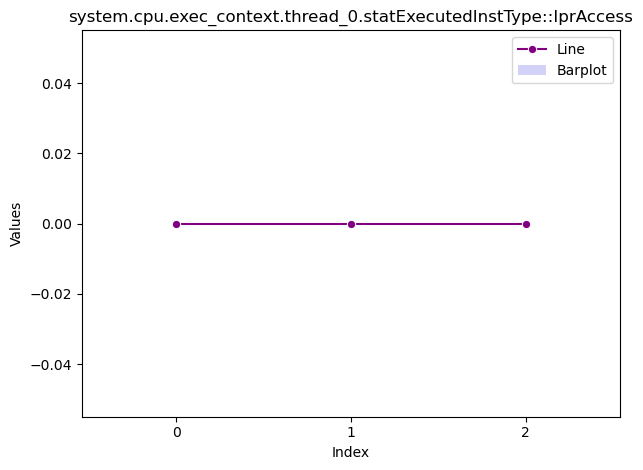

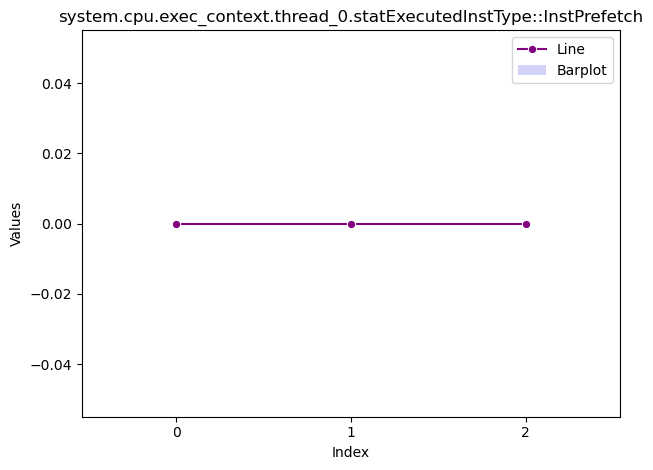

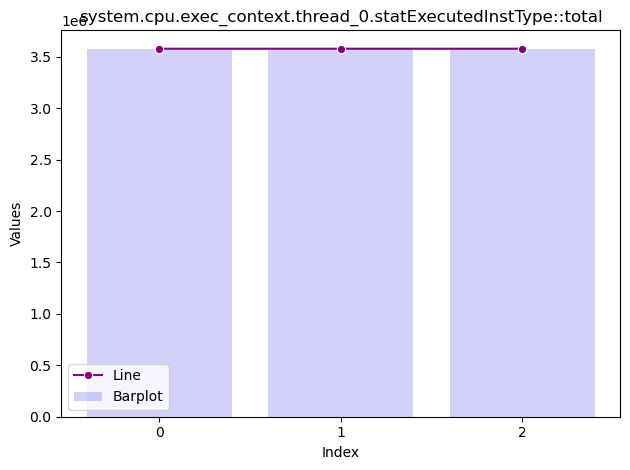

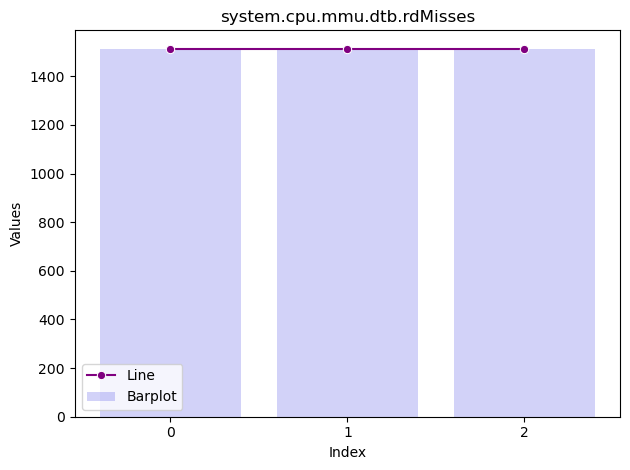

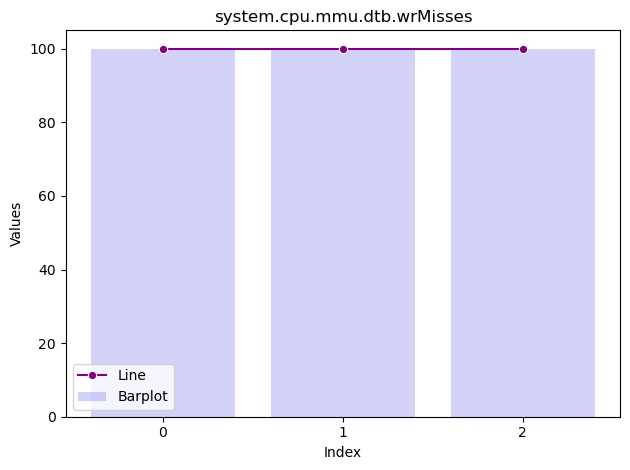

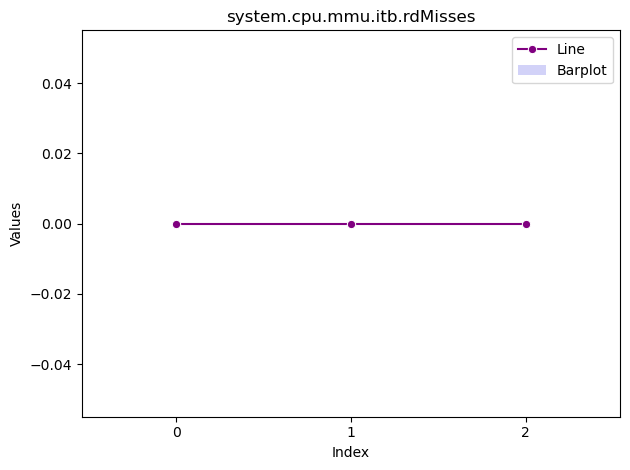

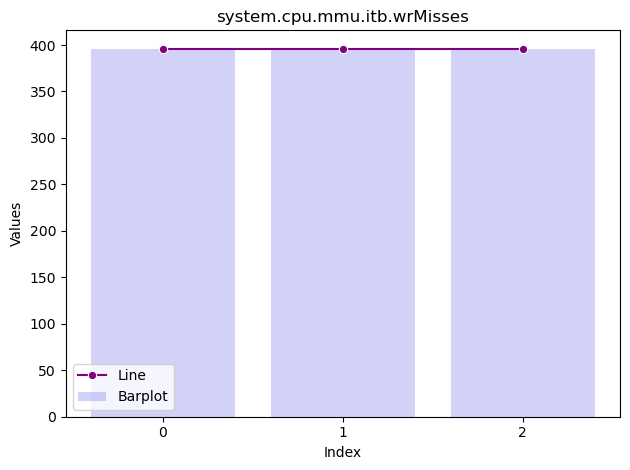

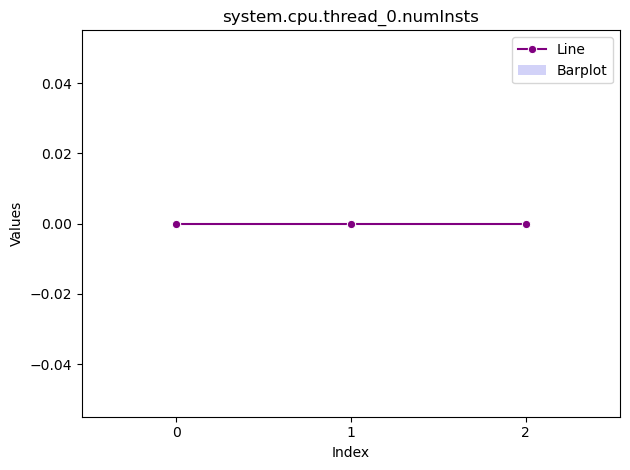

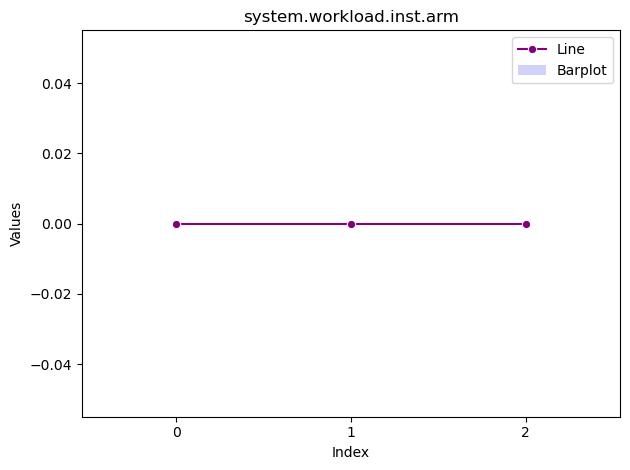

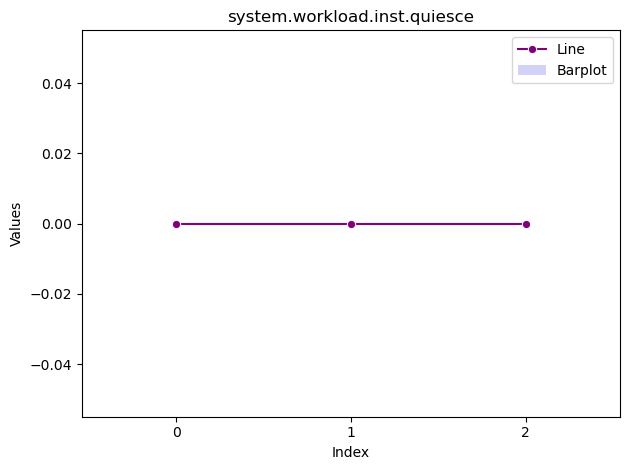

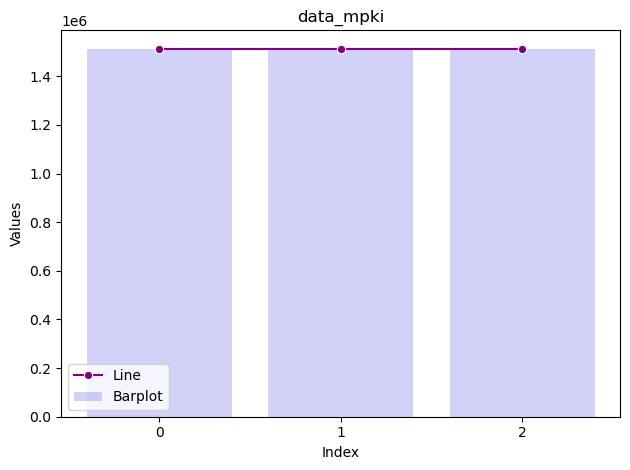

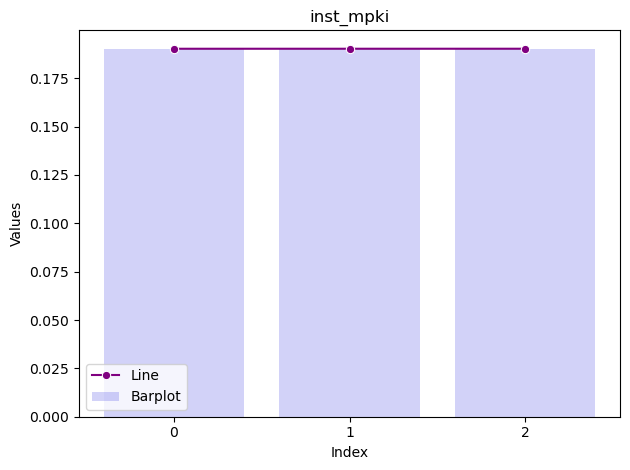

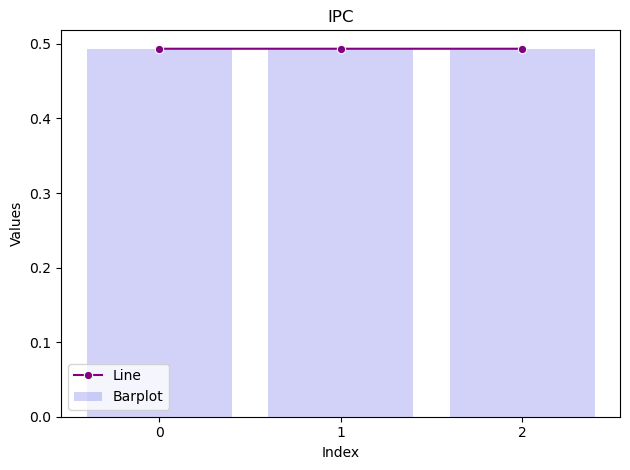

In [47]:
# make tighter layout to avoid having super long page

# these are the remaining columns just to have them laid out.  

for column in df.columns:
    plt.figure()  
    sns.barplot(x=df.index, y=df[column], color='blue', label = 'Barplot', alpha=0.2)
    sns.lineplot(x=df.index, y=df[column], marker='o', color = 'purple', label = 'Line')
    plt.title(column)  
    plt.xlabel('Index')  
    plt.ylabel('Values')  
    plt.tight_layout()
    plt.show()  